In [1]:
import sys
import numpy as np 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline  

# Brian Function Simulation

From the paper I read this week, they use Brian function as testing function for global optimization problem. As you can observe from contour map above, we have 3 global minimum and no local minimum. 

In [2]:
# Numerical decisions
N = 1000
x1 = np.linspace(-5, 10, N, endpoint=True)
x2 = np.linspace(0, 15, N, endpoint=True)

def Brainfunction(x1,x2):
    # Parameters of the function
    PI = 3.14159265359
    a = 1;
    b = 5.1/(4*pow(PI,2));
    c = 5/PI;
    r = 6;
    s = 10;
    t = 1/(8*PI);
    f = -a*(x2 - b*x1**2 + c*x1 -r)**2 + s*(1-t)*np.cos(x1) + s
    return f

In [3]:
sns.set(context="notebook", style="dark",
        rc={"axes.axisbelow": False})
def contourFunction(X, Y, Z, nbins=50):
    levels=mpl.ticker.MaxNLocator(nbins=nbins).tick_values(Z.min(),Z.max())
    plt.figure(figsize=(20,20))

    plt.subplot(2,1,1)
    plt.contourf(x1,x2,Z,levels=levels ,zorder=0,cmap=plt.get_cmap('rainbow_r'))
    plt.colorbar()

    plt.subplot(2,1,2)
    cp = plt.contour(X, Y, Z,levels=levels,cmap=plt.get_cmap('rainbow_r'))
    plt.clabel(cp, inline=True, fontsize=20)
    plt.colorbar()
    plt.grid('on')
    plt.title('Brinan Function Contour plot')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [5]:
Z

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ..., 
       [ 2.79408988,  2.80328056,  2.81162779, ...,         nan,
                nan,         nan],
       [ 2.80594032,  2.81486154,  2.82294472, ...,         nan,
                nan,         nan],
       [ 2.81766091,  2.8263153 ,  2.83413692, ...,         nan,
                nan,         nan]])

Brian Function

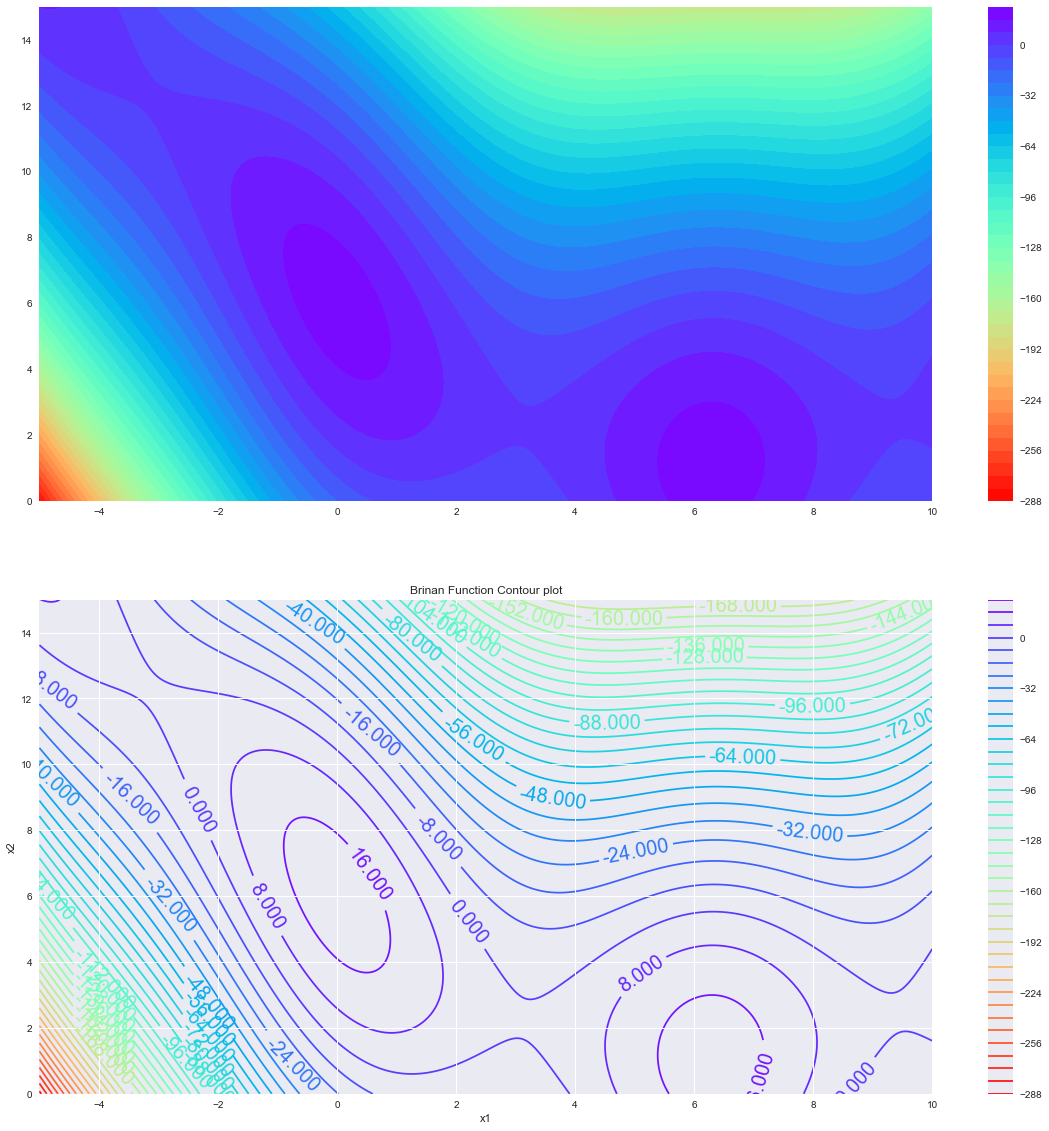

In [6]:
X,Y = np.meshgrid(x1,x2)
Z = Brainfunction(X,Y)
printmd('Brian Function')
contourFunction(X,Y,Z,50)

# Bayesian Simulation

In [233]:
!pip install bayesian-optimization

## Initial knowledge and visualization

In [7]:
def posterior(bo, x):
    # Fit gaussian process
    bo.gp.fit(bo.X, bo.Y)
    
    # Create predict value
    mu, sigma = bo.gp.predict(x, return_std=True)
    return mu, sigma

In [8]:
def plot_gp(bo, x, y,nbins=50):
    
    fig = plt.figure(figsize=(20, 20))
    fig.suptitle('Gaussian Process and Utility Function After {} Steps'.format(len(bo.X)), fontdict={'size':30})
    
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])
    axTar = plt.subplot(gs[0, 0])
    axPre = plt.subplot(gs[0, 1])
    acq = plt.subplot(gs[1,1])
    
    mu, sigma = posterior(bo, x)
    #axis.plot(x, y, linewidth=3, label='Target')
    #axis.plot(bo.X.flatten(), bo.Y, 'D', markersize=8, label=u'Observations', color='r')
    #axis.plot(x, mu, '--', color='k', label='Prediction')

    # Target
    size = int(np.sqrt(len(x[:,0])))
    levels=mpl.ticker.MaxNLocator(nbins=nbins).tick_values(Z.min(),Z.max())
    cp = axTar.contour(x[:,0].reshape(size,size), x[:,1].reshape(size,size), y, 
                       levels=levels,cmap=plt.get_cmap('rainbow_r'))
    plt.clabel(cp, inline=True, fontsize=10)
     
    # Prediction
    axPre.contour(x[:,0].reshape(size, size), x[:,1].reshape(size, size), mu.reshape(size, size) 
                  , levels=levels, cmap=plt.get_cmap('rainbow_r'))
    plt.clabel(cp, inline=True, fontsize=10)
    plt.clabel(cp, inline=True, fontsize=10)
    axPre.plot(bo.X[:,0], bo.X[:,1], 'D', markersize=6, label=u'Observations', color='r')
   
    
    utility = bo.util.utility(x, bo.gp, 0)
    acq.contour(x[:,0].reshape(size, size), x[:,1].reshape(size, size), utility.reshape(size, size), 
                label='Utility Function', levels=levels, cmap=plt.get_cmap('rainbow'))
    maxUtilityPoint = x[np.argmax(utility)]
    plt.clabel(cp, inline=True, fontsize=10)
    acq.plot(maxUtilityPoint[0], maxUtilityPoint[1], '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    #acq.set_xlim((-2, 10))
    #acq.set_ylim((0, np.max(utility) + 0.5))
    #acq.set_ylabel('Utility', fontdict={'size':20})
    #acq.set_xlabel('x', fontdict={'size':20})
    
    #axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    #acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    plt.show()

In [248]:
X1sample = X.flatten()
X2sample = Y.flatten()
Z = Brainfunction(X,Y)
Xsample = np.concatenate(([X1sample],[X2sample]),axis=0).T

In [ ]:
from bayes_opt import BayesianOptimization
bo = BayesianOptimization(Brainfunction, {'x1': (-5, 10),'x2': (0,15)})
bo.maximize(init_points=10, n_iter=0, acq='ei')
plot_gp(bo,Xsample,Z,60)

In [ ]:
for i in range(100):
    bo.maximize(init_points=0, n_iter=1)
    plot_gp(bo,Xsample,Z,60)